### Titanic


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train.csv')

In [3]:
# df

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.shape
# df.loc[0:5,'PassengerId':'Name']
# df.iloc[0:5,0:5]

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###### We have total 12 variables in this data from this we have 8 numeric and 4 categorical variable

In [8]:
# 

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
null_val=df.isnull().sum()/df.shape[0]*100

In [11]:
null_val

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [12]:
missing_val=null_val[null_val>0]

<AxesSubplot:>

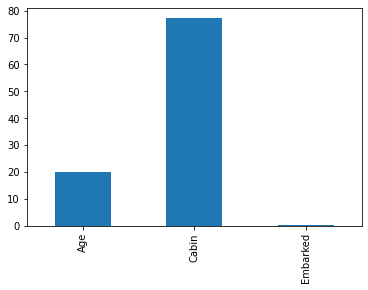

In [13]:
missing_val.plot.bar()

###### We can see that cabin variable has most missing values and embarked has very less missing values

In [14]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:ylabel='Survived'>

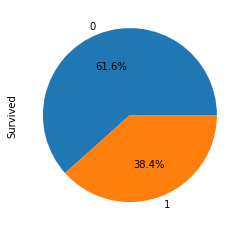

In [15]:
df['Survived'].value_counts().plot.pie(autopct='%1.1f%%')

###### survive rate is less than those who died

In [16]:
df.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

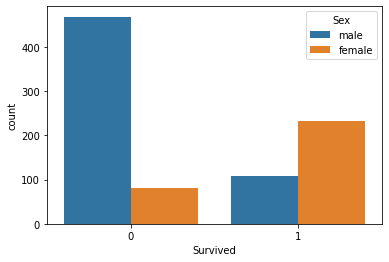

In [17]:
sns.countplot(df['Survived'],hue=df['Sex'])

###### the surviving sex is mainly female

In [18]:
df.groupby(['Survived','Sex'])['Pclass'].value_counts()

Survived  Sex     Pclass
0         female  3          72
                  2           6
                  1           3
          male    3         300
                  2          91
                  1          77
1         female  1          91
                  3          72
                  2          70
          male    3          47
                  1          45
                  2          17
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

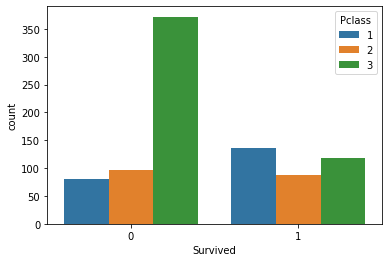

In [19]:
sns.countplot(df['Survived'],hue=df['Pclass'])

###### Surving rate of upper class people is more compare to lower and middle class

<AxesSubplot:xlabel='Parch', ylabel='count'>

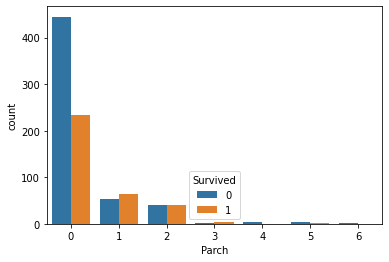

In [20]:
sns.countplot(df['Parch'],hue=df['Survived'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

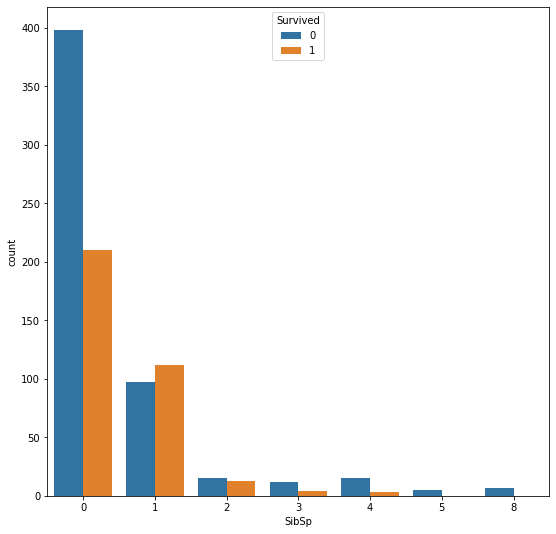

In [21]:
plt.figure(figsize=(9,9))
sns.countplot(df['SibSp'],hue=df['Survived'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

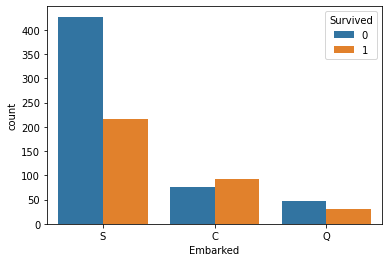

In [22]:
sns.countplot(df.Embarked,hue=df.Survived)

In [23]:
# loc and iloc
# loc-->labels 
# iloc-->integer
dd=df.loc[:,['Embarked','Fare','Pclass']].groupby(['Embarked','Pclass']).agg({'Fare':'mean'}).reset_index()
dd

,Embarked,Pclass,Fare
0,C,1,104.718529
1,C,2,25.358335
2,C,3,11.214083
3,Q,1,90.000000
4,Q,2,12.350000
5,Q,3,11.183393
6,S,1,70.364862
7,S,2,20.327439
8,S,3,14.644083


<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

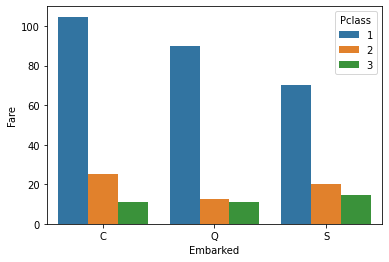

In [24]:
sns.barplot(dd['Embarked'],y=dd['Fare'],hue=dd['Pclass'])

###### 1st class ticket fare of every embarked is high. southampton(S) embarked ticket fare is less if we compare with C and Q

<AxesSubplot:xlabel='Age', ylabel='Count'>

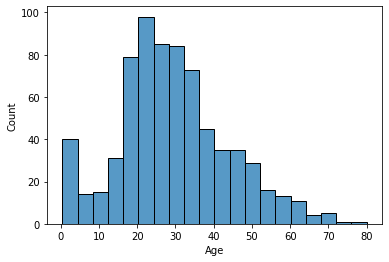

In [25]:
# df.Age
sns.histplot(df['Age'])

###### The max people who entered in ship has age range between 20-40

In [26]:
df['Age'].min()

0.42

In [27]:
df.loc[:,['Survived',"Age"]].groupby('Survived').agg({'Age':['min','max']})

Age      
           min   max
Survived            
0         1.00  74.0
1         0.42  80.0

###### A 4 month baby survived! 

In [28]:
df['Age'].max()

80.0

In [29]:
df.loc[:,['Survived',"Age"]].groupby('Survived').agg({'Age':['mean']}).round()

,Age
,mean
Survived,
0,31.0
1,28.0


## Data Preprocessing

In [30]:
df.drop(columns=['Name','Ticket','Cabin','PassengerId'],inplace=True)

In [31]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [32]:
df['Embarked'].mode()

0    S
dtype: object

In [33]:
df['Embarked'].fillna("S",inplace=True)

In [34]:
df['Embarked'].isnull().sum()

0

In [35]:
# df.isnull().sum().sum()

In [36]:
df['Age'].isnull().sum()

177

In [37]:
df['Age'].mean()

29.69911764705882

In [38]:
def fillage(data):
    age=data[0]
    survive=data[1]
    if pd.isnull(age):
        if survive=='1':
            return 28.0
        else:
            return 31.0
    else:
        return age

In [39]:
df['Age']=df[['Age',"Survived"]].apply(fillage,axis=1)

In [40]:
# df

In [41]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<AxesSubplot:>

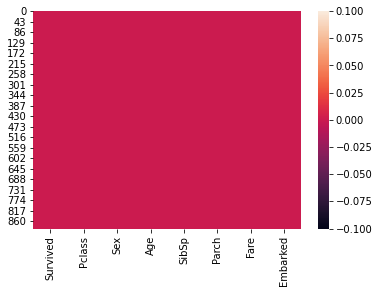

In [42]:
sns.heatmap(df.isnull())

In [43]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [44]:
# df=pd.get_dummies(df,columns=['Pclass'])
df["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [45]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [46]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [47]:
df=pd.get_dummies(df,columns=['Pclass','Sex','SibSp','Parch','Embarked'],drop_first=True)

In [48]:
df.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,26.0,7.9250,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [49]:
from sklearn.preprocessing import StandardScaler


In [50]:
# Standardscalar function is to used to standrize the data values into standard format
# Mean=0 and standard deviation =1
# it follows Standard normal Distribution
df.columns

Index(['Survived', 'Age', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male',
       'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8',
       'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [51]:
sc=StandardScaler()
scaler=['Age', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male',
       'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8',
       'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6',
       'Embarked_Q', 'Embarked_S']


In [52]:
df[scaler]=sc.fit_transform(df[scaler])

In [53]:
df.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,0,-0.611880,-0.502445,-0.510152,0.902587,0.737695,1.806421,-0.180125,-0.135225,-0.143592,-0.075122,-0.088986,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,-0.307562,0.615838
1,1,0.618409,0.786845,-0.510152,-1.107926,-1.355574,1.806421,-0.180125,-0.135225,-0.143592,-0.075122,-0.088986,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,-0.307562,-1.623803
2,1,-0.304307,-0.488854,-0.510152,0.902587,-1.355574,-0.553581,-0.180125,-0.135225,-0.143592,-0.075122,-0.088986,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,-0.307562,0.615838
3,1,0.387730,0.420730,-0.510152,-1.107926,-1.355574,1.806421,-0.180125,-0.135225,-0.143592,-0.075122,-0.088986,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,-0.307562,0.615838
4,0,0.387730,-0.486337,-0.510152,0.902587,0.737695,-0.553581,-0.180125,-0.135225,-0.143592,-0.075122,-0.088986,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352,-0.307562,0.615838


# Model Building

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X=df.drop('Survived',axis=1) #independent variable
y=df['Survived'] #target variable
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.25,train_size=0.75)

In [56]:
X_train.shape,X_test.shape


((668, 19), (223, 19))

In [57]:
y_train.shape

(668,)

In [58]:
X_train.shape

(668, 19)

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred=dt.predict(X_test)

In [61]:
pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1], dtype=int64)

In [62]:
# y_test

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
acc=accuracy_score(pred,y_test)

In [65]:
acc

0.7668161434977578

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf=RandomForestClassifier()

In [68]:
rf.fit(X_train,y_train)
predrf=rf.predict(X_test)


In [69]:
predrf

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0], dtype=int64)

In [70]:
accrf=accuracy_score(predrf,y_test)

In [71]:
accrf

0.820627802690583

### Conclusion
##### We got better accuracy using random forest

In [72]:
# Break